# Perceptron 
<b>(Artificial neuron)</b>
- A perceptron is a single layer neural network
- It acts a Linear Classifier,Binary classification
- Loss Function : Binary classification (-ve of Log Likelohood)
- Optimization : Gradient Descent/Stochastic Gradient descent    

# Learning Goals
- How to implement Perceptron>
- Understanding Vectorization,writing efficient code with out using for loop
- What is the meaning of linear classsifier?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

### Generating Data

In [3]:
X,Y = make_blobs(n_samples=500,centers = 2,n_features = 2,random_state=None)

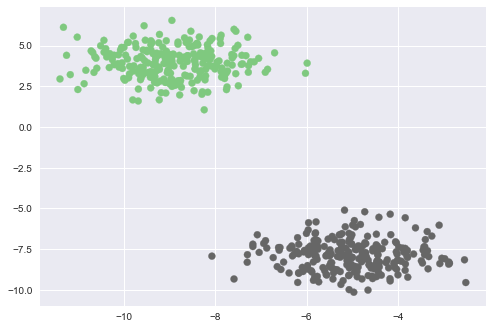

In [4]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.show()

## Implement Perceptron Learning Algorithim
- Learn the weights
- Reduce the loss
- Make the Predictions

<img src = "r1.png"/>

In [5]:
## Model and helper functions
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [6]:
def predict(X,weights):
    
    """
    params:
    X       - m x n+1  matrix
    weights - n+1 x 1  vector
    """
    
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [7]:
def loss(X,y,weights):
    """
    Binary Cross Entropy
    """
    y_ = predict(X,weights)
    cost = np.mean(-y*np.log(y_) - (1-y)*np.log(1-y_))
    return cost

In [8]:
def update(X,y,weights,alpha):
    """
    Perform weight upates for 1 epoch
    """
    y_ = predict(X,weights)
    dw = np.dot(X.T,y_ - y)
        
    m = X.shape[0]
    weights = weights - alpha*dw/(float(m))
    
    return weights

<img src = "perceprton.png"/> 

In [9]:
def train(X,y,alpha= 0.8,epochs = 1000):
    
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    weights = np.zeros(X.shape[1])
    
    for epoch in range(epochs):
        weights = update(X,y,weights,alpha)
        
        if epoch%100 == 0:
            L = loss(X,y,weights)
            print("Loss after %d epoch is %.4f"%(epoch,L))
            
    return weights      
    
    

In [10]:
weights = train(X,Y)

Loss after 0 epoch is 0.0000
Loss after 100 epoch is 0.0000
Loss after 200 epoch is 0.0000
Loss after 300 epoch is 0.0000
Loss after 400 epoch is 0.0000
Loss after 500 epoch is 0.0000
Loss after 600 epoch is 0.0000
Loss after 700 epoch is 0.0000
Loss after 800 epoch is 0.0000
Loss after 900 epoch is 0.0000


## Perceptron Implementation -  II
- Make predections
- Visualise Decision Surface
- Linear vs Non Linear classification

In [11]:
def getPredctions(X_Test,weights,labels = True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [12]:
weights

array([ 1.76572949e-03,  7.74662116e-01, -2.37874577e+00])

In [13]:
x1 = np.linspace(-8,10,100)

x2 = -(weights[0] + weights[1]*x1)/weights[2]

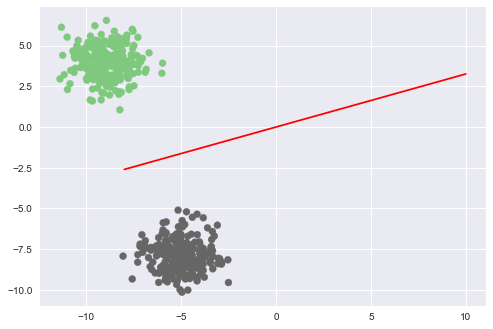

In [14]:
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,c = 'red')
plt.show()

In [15]:
y_ = getPredctions(X,weights,labels=True)

In [16]:
np.mean(y_ == Y)

1.0

## Non Linear datasets

In [17]:
X,Y = make_moons(n_samples=1000,shuffle = True,noise = 0.2)

In [18]:
weights = train(X,Y)

Loss after 0 epoch is 0.6199
Loss after 100 epoch is 0.2981
Loss after 200 epoch is 0.2916
Loss after 300 epoch is 0.2906
Loss after 400 epoch is 0.2905
Loss after 500 epoch is 0.2904
Loss after 600 epoch is 0.2904
Loss after 700 epoch is 0.2904
Loss after 800 epoch is 0.2904
Loss after 900 epoch is 0.2904


In [19]:
x1 = np.linspace(-8,10,100)

x2 = -(weights[0] + weights[1]*x1)/weights[2]

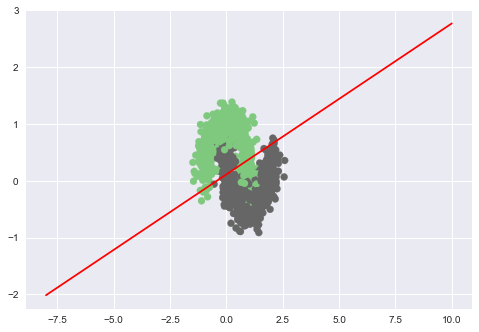

In [20]:
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,c = 'red')
plt.show()